<a href="https://colab.research.google.com/github/thesimaranjaira/AspectExtraction_SentimentAnalysis/blob/main/windelta_spot_imbalance_winter_NO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install energyquantified

     |████████████████████████████████| 76 kB 3.5 MB/s 
     |████████████████████████████████| 61 kB 1.7 MB/s 
     |████████████████████████████████| 227 kB 71.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled python-dateutil-2.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import pandas as pd
from datetime import timedelta, date
from energyquantified import EnergyQuantified
from energyquantified.time import Frequency
from energyquantified.metadata import Aggregation
from datetime import datetime as dtdatetime
from energyquantified.time import (
   Resolution, Frequency, UTC, get_datetime
)
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
api_key = 'ea1244-4926fe-571bed-d0f4b5'
EQ = EnergyQuantified(api_key=api_key)

In [6]:
from datetime import datetime, time

In [7]:
day_ahead_zero = EQ.timeseries.load(
   'NO2 Wind Power Production MWh/h H Actual',
   begin='2020-11-01',
   end='2021-02-27',
   frequency=Frequency.PT1H
)
day_ahead_zero = day_ahead_zero.to_dataframe()

In [8]:
day_ahead_zero

,NO2 Wind Power Production MWh/h H Actual
,
,
date,
2020-11-01 00:00:00+01:00,845
2020-11-01 01:00:00+01:00,591
2020-11-01 02:00:00+01:00,517
2020-11-01 03:00:00+01:00,330
2020-11-01 04:00:00+01:00,265
...,...
2021-02-26 19:00:00+01:00,496


In [9]:
day_ahead_forecast_twelve = EQ.instances.relative(
   'NO2 Wind Power Production MWh/h 15min Forecast',
   begin=dtdatetime(2020, 11, 1, 0, 0, 0),
   end=dtdatetime(2021, 2, 27, 0, 0, 0),
   tag='arome',
   days_ahead = 1,  # The day-ahead forecast (0 or higher allowed)
   time_of_day = time(12, 0),  # Issued at exactly 12:00
  #  issued ='earliest',
   frequency = Frequency.PT1H
)
day_ahead_twelve=day_ahead_forecast_twelve.to_dataframe()

In [10]:
day_ahead_twelve

,NO2 Wind Power Production MWh/h 15min Forecast
,
,
date,
2020-11-01 00:00:00+01:00,894.95
2020-11-01 01:00:00+01:00,646.20
2020-11-01 02:00:00+01:00,450.75
2020-11-01 03:00:00+01:00,308.62
2020-11-01 04:00:00+01:00,250.32
...,...
2021-02-26 19:00:00+01:00,378.53


In [11]:
df_comb = pd.merge(day_ahead_zero, day_ahead_twelve, left_index=True, right_index=True, how='inner')
df_comb

,NO2 Wind Power Production MWh/h H Actual,NO2 Wind Power Production MWh/h 15min Forecast
,,
,,
date,,
2020-11-01 00:00:00+01:00,845,894.95
2020-11-01 01:00:00+01:00,591,646.20
2020-11-01 02:00:00+01:00,517,450.75
2020-11-01 03:00:00+01:00,330,308.62
2020-11-01 04:00:00+01:00,265,250.32
...,...,...
2021-02-26 19:00:00+01:00,496,378.53


In [12]:
df_comb.columns

MultiIndex([(      'NO2 Wind Power Production MWh/h H Actual', '', ''),
            ('NO2 Wind Power Production MWh/h 15min Forecast', '', '')],
           )

In [13]:
df_comb['Wind Delta', '', '']= df_comb['NO2 Wind Power Production MWh/h H Actual',''] - df_comb['NO2 Wind Power Production MWh/h 15min Forecast','']

/usr/local/lib/python3.7/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [14]:
df_comb

,NO2 Wind Power Production MWh/h H Actual,NO2 Wind Power Production MWh/h 15min Forecast,Wind Delta
,,,
,,,
date,,,
2020-11-01 00:00:00+01:00,845,894.95,-49.95
2020-11-01 01:00:00+01:00,591,646.20,-55.20
2020-11-01 02:00:00+01:00,517,450.75,66.25
2020-11-01 03:00:00+01:00,330,308.62,21.38
2020-11-01 04:00:00+01:00,265,250.32,14.68
...,...,...,...
2021-02-26 19:00:00+01:00,496,378.53,117.47


In [15]:
df_comb.columns

MultiIndex([(      'NO2 Wind Power Production MWh/h H Actual', '', ''),
            ('NO2 Wind Power Production MWh/h 15min Forecast', '', ''),
            (                                    'Wind Delta', '', '')],
           )

In [16]:
# df_comb.drop(['NO2 Wind Power Production MWh/h H Actual', 'NO2 Wind Power Production MWh/h 15min Forecast'], axis=1, level=0 ,inplace=True)
df_comb

,NO2 Wind Power Production MWh/h H Actual,NO2 Wind Power Production MWh/h 15min Forecast,Wind Delta
,,,
,,,
date,,,
2020-11-01 00:00:00+01:00,845,894.95,-49.95
2020-11-01 01:00:00+01:00,591,646.20,-55.20
2020-11-01 02:00:00+01:00,517,450.75,66.25
2020-11-01 03:00:00+01:00,330,308.62,21.38
2020-11-01 04:00:00+01:00,265,250.32,14.68
...,...,...,...
2021-02-26 19:00:00+01:00,496,378.53,117.47


In [17]:
df_comb.columns = ['_'.join(col) for col in df_comb.columns.values]

In [18]:
df_comb

,NO2 Wind Power Production MWh/h H Actual__,NO2 Wind Power Production MWh/h 15min Forecast__,Wind Delta__
date,,,
2020-11-01 00:00:00+01:00,845,894.95,-49.95
2020-11-01 01:00:00+01:00,591,646.20,-55.20
2020-11-01 02:00:00+01:00,517,450.75,66.25
2020-11-01 03:00:00+01:00,330,308.62,21.38
2020-11-01 04:00:00+01:00,265,250.32,14.68
...,...,...,...
2021-02-26 19:00:00+01:00,496,378.53,117.47
2021-02-26 20:00:00+01:00,539,416.23,122.77
2021-02-26 21:00:00+01:00,544,500.43,43.57


In [19]:
df_comb.columns

Index(['NO2 Wind Power Production MWh/h H Actual__', 'NO2 Wind Power Production MWh/h 15min Forecast__', 'Wind Delta__'], dtype='object')

In [20]:
spot=(pd.read_csv('/content/drive/My Drive/dataset/market_prices_euro_updated.csv', index_col = ["time"], parse_dates=True).loc[:,"NO2_spot"])
imbalance = (pd.read_csv('/content/drive/My Drive/dataset/market_prices_euro_updated.csv', index_col = ["time"], parse_dates=True).loc[:,"NO2_imbalance"])

In [21]:
spot=spot.to_frame()
imbalance= imbalance.to_frame()

In [22]:
spot

,NO2_spot
time,
2018-02-01 00:00:00,0.02552
2018-02-01 01:00:00,0.02586
2018-02-01 02:00:00,0.02558
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02684
...,...
2021-04-22 08:00:00,0.04208
2021-04-22 09:00:00,0.03969
2021-04-22 10:00:00,0.03829


In [23]:
imbalance

,NO2_imbalance
time,
2018-02-01 00:00:00,0.02131
2018-02-01 01:00:00,0.02131
2018-02-01 02:00:00,0.02131
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02334
...,...
2021-04-22 08:00:00,0.04208
2021-04-22 09:00:00,0.03969
2021-04-22 10:00:00,0.03829


In [24]:
imbalance.tz_localize(None)

,NO2_imbalance
time,
2018-02-01 00:00:00,0.02131
2018-02-01 01:00:00,0.02131
2018-02-01 02:00:00,0.02131
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02334
...,...
2021-04-22 08:00:00,0.04208
2021-04-22 09:00:00,0.03969
2021-04-22 10:00:00,0.03829


In [25]:
imbalance.index = pd.to_datetime(imbalance.index, utc=True).tz_convert('Europe/Stockholm')

In [26]:
imbalance

,NO2_imbalance
time,
2018-02-01 01:00:00+01:00,0.02131
2018-02-01 02:00:00+01:00,0.02131
2018-02-01 03:00:00+01:00,0.02131
2018-02-01 04:00:00+01:00,0.02573
2018-02-01 05:00:00+01:00,0.02334
...,...
2021-04-22 10:00:00+02:00,0.04208
2021-04-22 11:00:00+02:00,0.03969
2021-04-22 12:00:00+02:00,0.03829


In [27]:
spot.tz_localize(None)

,NO2_spot
time,
2018-02-01 00:00:00,0.02552
2018-02-01 01:00:00,0.02586
2018-02-01 02:00:00,0.02558
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02684
...,...
2021-04-22 08:00:00,0.04208
2021-04-22 09:00:00,0.03969
2021-04-22 10:00:00,0.03829


In [28]:
spot.index = pd.to_datetime(spot.index, utc=True).tz_convert('Europe/Stockholm')

In [29]:
spot

,NO2_spot
time,
2018-02-01 01:00:00+01:00,0.02552
2018-02-01 02:00:00+01:00,0.02586
2018-02-01 03:00:00+01:00,0.02558
2018-02-01 04:00:00+01:00,0.02573
2018-02-01 05:00:00+01:00,0.02684
...,...
2021-04-22 10:00:00+02:00,0.04208
2021-04-22 11:00:00+02:00,0.03969
2021-04-22 12:00:00+02:00,0.03829


In [30]:
df_comb.tz_convert(None)

,NO2 Wind Power Production MWh/h H Actual__,NO2 Wind Power Production MWh/h 15min Forecast__,Wind Delta__
date,,,
2020-10-31 23:00:00,845,894.95,-49.95
2020-11-01 00:00:00,591,646.20,-55.20
2020-11-01 01:00:00,517,450.75,66.25
2020-11-01 02:00:00,330,308.62,21.38
2020-11-01 03:00:00,265,250.32,14.68
...,...,...,...
2021-02-26 18:00:00,496,378.53,117.47
2021-02-26 19:00:00,539,416.23,122.77
2021-02-26 20:00:00,544,500.43,43.57


In [31]:
df_comb.index = pd.to_datetime(df_comb.index, utc=True).tz_convert('Europe/Stockholm')

In [32]:
df_comb

,NO2 Wind Power Production MWh/h H Actual__,NO2 Wind Power Production MWh/h 15min Forecast__,Wind Delta__
date,,,
2020-11-01 00:00:00+01:00,845,894.95,-49.95
2020-11-01 01:00:00+01:00,591,646.20,-55.20
2020-11-01 02:00:00+01:00,517,450.75,66.25
2020-11-01 03:00:00+01:00,330,308.62,21.38
2020-11-01 04:00:00+01:00,265,250.32,14.68
...,...,...,...
2021-02-26 19:00:00+01:00,496,378.53,117.47
2021-02-26 20:00:00+01:00,539,416.23,122.77
2021-02-26 21:00:00+01:00,544,500.43,43.57


In [33]:
df_plot = pd.merge(df_comb, spot , left_index=True, right_index=True, how='inner')
df_plot

,NO2 Wind Power Production MWh/h H Actual__,NO2 Wind Power Production MWh/h 15min Forecast__,Wind Delta__,NO2_spot
2020-11-01 00:00:00+01:00,845,894.95,-49.95,0.00457
2020-11-01 01:00:00+01:00,591,646.20,-55.20,0.02630
2020-11-01 02:00:00+01:00,517,450.75,66.25,0.02615
2020-11-01 03:00:00+01:00,330,308.62,21.38,0.02575
2020-11-01 04:00:00+01:00,265,250.32,14.68,0.02541
...,...,...,...,...
2021-02-26 19:00:00+01:00,496,378.53,117.47,0.03275
2021-02-26 20:00:00+01:00,539,416.23,122.77,0.02997
2021-02-26 21:00:00+01:00,544,500.43,43.57,0.02985
2021-02-26 22:00:00+01:00,428,534.50,-106.50,0.02979


In [34]:
df_plot = pd.merge(df_plot, imbalance, left_index=True, right_index=True, how='inner')
df_plot

,NO2 Wind Power Production MWh/h H Actual__,NO2 Wind Power Production MWh/h 15min Forecast__,Wind Delta__,NO2_spot,NO2_imbalance
2020-11-01 00:00:00+01:00,845,894.95,-49.95,0.00457,0.00179
2020-11-01 01:00:00+01:00,591,646.20,-55.20,0.02630,0.03000
2020-11-01 02:00:00+01:00,517,450.75,66.25,0.02615,0.02940
2020-11-01 03:00:00+01:00,330,308.62,21.38,0.02575,0.02710
2020-11-01 04:00:00+01:00,265,250.32,14.68,0.02541,0.02700
...,...,...,...,...,...
2021-02-26 19:00:00+01:00,496,378.53,117.47,0.03275,0.02100
2021-02-26 20:00:00+01:00,539,416.23,122.77,0.02997,0.02100
2021-02-26 21:00:00+01:00,544,500.43,43.57,0.02985,0.01977
2021-02-26 22:00:00+01:00,428,534.50,-106.50,0.02979,0.01977


In [35]:
df_plot.columns

Index(['NO2 Wind Power Production MWh/h H Actual__', 'NO2 Wind Power Production MWh/h 15min Forecast__', 'Wind Delta__', 'NO2_spot', 'NO2_imbalance'], dtype='object')

In [36]:
# df_plot['Direction']= df_plot['NO2_spot']-df_plot['NO2_imbalance'] 

In [37]:
df_plot

,NO2 Wind Power Production MWh/h H Actual__,NO2 Wind Power Production MWh/h 15min Forecast__,Wind Delta__,NO2_spot,NO2_imbalance
2020-11-01 00:00:00+01:00,845,894.95,-49.95,0.00457,0.00179
2020-11-01 01:00:00+01:00,591,646.20,-55.20,0.02630,0.03000
2020-11-01 02:00:00+01:00,517,450.75,66.25,0.02615,0.02940
2020-11-01 03:00:00+01:00,330,308.62,21.38,0.02575,0.02710
2020-11-01 04:00:00+01:00,265,250.32,14.68,0.02541,0.02700
...,...,...,...,...,...
2021-02-26 19:00:00+01:00,496,378.53,117.47,0.03275,0.02100
2021-02-26 20:00:00+01:00,539,416.23,122.77,0.02997,0.02100
2021-02-26 21:00:00+01:00,544,500.43,43.57,0.02985,0.01977
2021-02-26 22:00:00+01:00,428,534.50,-106.50,0.02979,0.01977


In [38]:
# df_plot.drop(['NO2_spot', 'NO2_imbalance'], axis=1, inplace=True)

In [39]:
df_plot.index.name="Date"

In [40]:
df_plot

,NO2 Wind Power Production MWh/h H Actual__,NO2 Wind Power Production MWh/h 15min Forecast__,Wind Delta__,NO2_spot,NO2_imbalance
Date,,,,,
2020-11-01 00:00:00+01:00,845,894.95,-49.95,0.00457,0.00179
2020-11-01 01:00:00+01:00,591,646.20,-55.20,0.02630,0.03000
2020-11-01 02:00:00+01:00,517,450.75,66.25,0.02615,0.02940
2020-11-01 03:00:00+01:00,330,308.62,21.38,0.02575,0.02710
2020-11-01 04:00:00+01:00,265,250.32,14.68,0.02541,0.02700
...,...,...,...,...,...
2021-02-26 19:00:00+01:00,496,378.53,117.47,0.03275,0.02100
2021-02-26 20:00:00+01:00,539,416.23,122.77,0.02997,0.02100
2021-02-26 21:00:00+01:00,544,500.43,43.57,0.02985,0.01977


In [41]:
df_plot.columns

Index(['NO2 Wind Power Production MWh/h H Actual__', 'NO2 Wind Power Production MWh/h 15min Forecast__', 'Wind Delta__', 'NO2_spot', 'NO2_imbalance'], dtype='object')

In [42]:
df_plot['NO2_spot'] = df_plot['NO2_spot'].apply(lambda x: x*1000)

In [43]:
df_plot['NO2_imbalance'] = df_plot['NO2_imbalance'].apply(lambda y: y*1000)

In [44]:
df_plot

,NO2 Wind Power Production MWh/h H Actual__,NO2 Wind Power Production MWh/h 15min Forecast__,Wind Delta__,NO2_spot,NO2_imbalance
Date,,,,,
2020-11-01 00:00:00+01:00,845,894.95,-49.95,4.57,1.79
2020-11-01 01:00:00+01:00,591,646.20,-55.20,26.30,30.00
2020-11-01 02:00:00+01:00,517,450.75,66.25,26.15,29.40
2020-11-01 03:00:00+01:00,330,308.62,21.38,25.75,27.10
2020-11-01 04:00:00+01:00,265,250.32,14.68,25.41,27.00
...,...,...,...,...,...
2021-02-26 19:00:00+01:00,496,378.53,117.47,32.75,21.00
2021-02-26 20:00:00+01:00,539,416.23,122.77,29.97,21.00
2021-02-26 21:00:00+01:00,544,500.43,43.57,29.85,19.77


In [45]:
df_plot.columns

Index(['NO2 Wind Power Production MWh/h H Actual__', 'NO2 Wind Power Production MWh/h 15min Forecast__', 'Wind Delta__', 'NO2_spot', 'NO2_imbalance'], dtype='object')

In [46]:
df_plot['Wind Delta__'].astype('float64')

Date
2020-11-01 00:00:00+01:00    -49.95
2020-11-01 01:00:00+01:00    -55.20
2020-11-01 02:00:00+01:00     66.25
2020-11-01 03:00:00+01:00     21.38
2020-11-01 04:00:00+01:00     14.68
                              ...  
2021-02-26 19:00:00+01:00    117.47
2021-02-26 20:00:00+01:00    122.77
2021-02-26 21:00:00+01:00     43.57
2021-02-26 22:00:00+01:00   -106.50
2021-02-26 23:00:00+01:00   -180.90
Name: Wind Delta__, Length: 2384, dtype: float64

In [47]:
df_plot['NO2_spot'].astype('float64')

Date
2020-11-01 00:00:00+01:00     4.57
2020-11-01 01:00:00+01:00    26.30
2020-11-01 02:00:00+01:00    26.15
2020-11-01 03:00:00+01:00    25.75
2020-11-01 04:00:00+01:00    25.41
                             ...  
2021-02-26 19:00:00+01:00    32.75
2021-02-26 20:00:00+01:00    29.97
2021-02-26 21:00:00+01:00    29.85
2021-02-26 22:00:00+01:00    29.79
2021-02-26 23:00:00+01:00    29.87
Name: NO2_spot, Length: 2384, dtype: float64

In [48]:
df_plot['NO2_imbalance'].astype('float64')

Date
2020-11-01 00:00:00+01:00     1.79
2020-11-01 01:00:00+01:00    30.00
2020-11-01 02:00:00+01:00    29.40
2020-11-01 03:00:00+01:00    27.10
2020-11-01 04:00:00+01:00    27.00
                             ...  
2021-02-26 19:00:00+01:00    21.00
2021-02-26 20:00:00+01:00    21.00
2021-02-26 21:00:00+01:00    19.77
2021-02-26 22:00:00+01:00    19.77
2021-02-26 23:00:00+01:00    19.82
Name: NO2_imbalance, Length: 2384, dtype: float64

In [49]:
# imbalance.columns

In [50]:
# imbalance['NO2_imbalance'].astype('float64')

In [51]:
# spot.columns

In [52]:
# spot['NO2_spot'].astype('float64')

In [53]:
blue = sns.color_palette("muted", desat=0.9)[0]
green = sns.color_palette("muted", desat=0.9)[2]
red = sns.color_palette("muted", desat=0.9)[3]
grey = sns.color_palette("muted", desat=0.9)[7]

In [54]:
# fig, ax1 = plt.subplots(figsize=[20,7])

# x = df_plot.index
# plt.xlabel("Timestamp")
# plt.ylabel("Wind Delta", fontsize=12, color=red);
# y1 = df_plot['Wind Delta__']
# y2 = df_plot['Direction']

# ax2 = ax1.twinx()

# ax1.scatter(x, y1, alpha=0.6, lw=4, color=red)
# plt.ylabel("Direction of Market", fontsize=12, color=blue);
# ax2.scatter(x, y2, alpha=0.6, lw=4, color=blue)
# ax1.invert_yaxis()
# ax2.invert_yaxis()
# plt.autoscale();

In [55]:
day_ahead_twelve.tz_localize(None)

,NO2 Wind Power Production MWh/h 15min Forecast
,
,
date,
2020-11-01 00:00:00,894.95
2020-11-01 01:00:00,646.20
2020-11-01 02:00:00,450.75
2020-11-01 03:00:00,308.62
2020-11-01 04:00:00,250.32
...,...
2021-02-26 19:00:00,378.53


In [56]:
day_ahead_twelve.index= pd.to_datetime(day_ahead_twelve.index, utc=True).tz_convert('Europe/Stockholm')

In [57]:
day_ahead_twelve

,NO2 Wind Power Production MWh/h 15min Forecast
,
,
date,
2020-11-01 00:00:00+01:00,894.95
2020-11-01 01:00:00+01:00,646.20
2020-11-01 02:00:00+01:00,450.75
2020-11-01 03:00:00+01:00,308.62
2020-11-01 04:00:00+01:00,250.32
...,...
2021-02-26 19:00:00+01:00,378.53


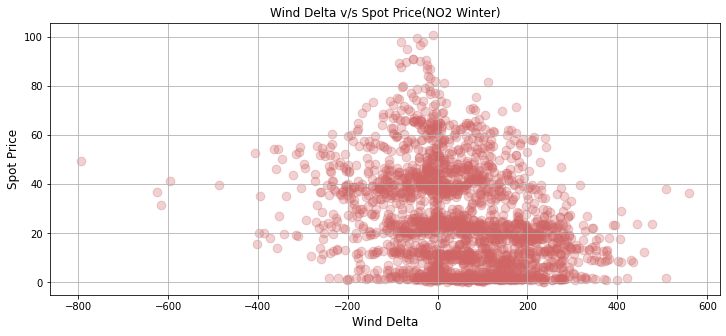

In [58]:
fig= plt.figure(figsize=[12,5])
plt.scatter(x=df_plot['Wind Delta__'],
            y=df_plot['NO2_spot'],
            alpha=0.3,
            s=75,
            color=red);
plt.grid()
plt.xlabel("Wind Delta", fontsize=12),
plt.ylabel("Spot Price", fontsize=12);
plt.title("Wind Delta v/s Spot Price(NO2 Winter)");
plt.autoscale();

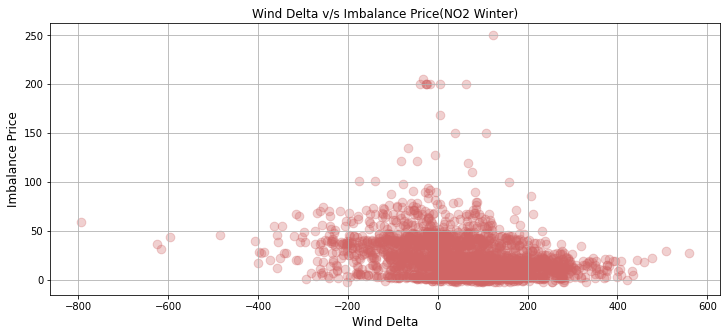

In [59]:
fig= plt.figure(figsize=[12,5])
plt.scatter(x=df_plot['Wind Delta__'],
            y=df_plot['NO2_imbalance'],
            alpha=0.3,
            s=75,
            color=red);
plt.grid()
plt.xlabel("Wind Delta", fontsize=12),
plt.ylabel("Imbalance Price", fontsize=12);
plt.title("Wind Delta v/s Imbalance Price(NO2 Winter)");
plt.autoscale();

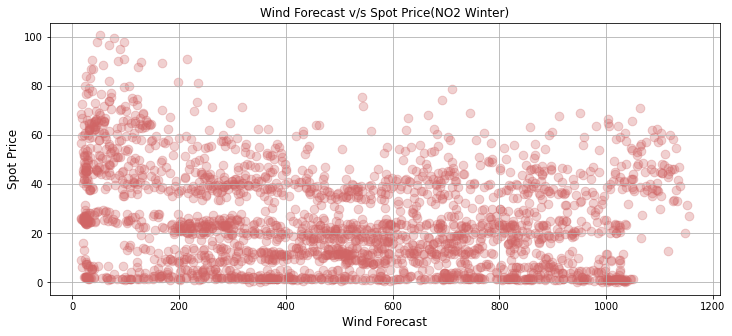

In [60]:
fig= plt.figure(figsize=[12,5])
plt.scatter(x=df_plot['NO2 Wind Power Production MWh/h 15min Forecast__'],
            y=df_plot['NO2_spot'],
            alpha=0.3,
            s=75,
            color=red);
plt.grid()
plt.xlabel("Wind Forecast", fontsize=12),
plt.ylabel("Spot Price", fontsize=12);
plt.title("Wind Forecast v/s Spot Price(NO2 Winter)");
plt.autoscale();